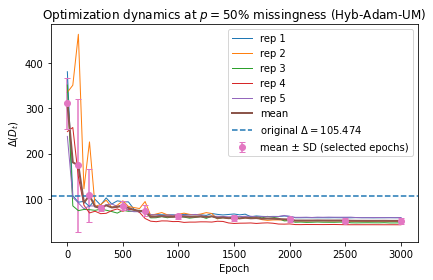

In [5]:
import re
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Paste your full console log into LOG (triple quotes)
# ----------------------------
LOG = r"""


Processing 50% missing, replicate 1...
Initial robust Δ: 243.066975
Epoch     1 | full Δ = 381.057073 | lr=0.04000
Epoch    50 | full Δ = 106.895121 | lr=0.04000
Epoch   100 | full Δ = 92.239178 | lr=0.04000
Epoch   150 | full Δ = 94.305672 | lr=0.04000
Epoch   200 | full Δ = 82.451682 | lr=0.04000
Epoch   250 | full Δ = 98.693658 | lr=0.04000
Epoch   300 | full Δ = 85.928601 | lr=0.04000
Epoch   350 | full Δ = 101.890860 | lr=0.04000
Epoch   400 | full Δ = 88.335313 | lr=0.04000
Epoch   450 | full Δ = 95.304443 | lr=0.04000
Epoch   500 | full Δ = 93.485534 | lr=0.04000
Epoch   550 | full Δ = 92.988153 | lr=0.04000
Epoch 00550: lr plateau 0.040000->0.020000
Epoch   600 | full Δ = 76.819292 | lr=0.02000
Epoch   650 | full Δ = 70.200410 | lr=0.02000
Epoch 00700: lr milestone 0.020000->0.010000
Epoch   700 | full Δ = 74.598075 | lr=0.01000
Epoch   750 | full Δ = 64.288624 | lr=0.01000
Epoch   800 | full Δ = 64.982691 | lr=0.01000
Epoch   850 | full Δ = 64.465249 | lr=0.01000
Epoch   900 | full Δ = 64.335373 | lr=0.01000
Epoch   950 | full Δ = 64.364539 | lr=0.01000
Epoch  1000 | full Δ = 63.397518 | lr=0.01000
Epoch  1050 | full Δ = 65.370420 | lr=0.01000
Epoch  1100 | full Δ = 64.751692 | lr=0.01000
Epoch  1150 | full Δ = 64.625972 | lr=0.01000
Epoch  1200 | full Δ = 64.559146 | lr=0.01000
Epoch  1250 | full Δ = 63.038766 | lr=0.01000
Epoch  1300 | full Δ = 67.310358 | lr=0.01000
Epoch  1350 | full Δ = 65.363387 | lr=0.01000
Epoch  1400 | full Δ = 64.127679 | lr=0.01000
Epoch  1450 | full Δ = 65.129194 | lr=0.01000
Epoch  1500 | full Δ = 66.255599 | lr=0.01000
Epoch  1550 | full Δ = 64.292794 | lr=0.01000
Epoch  1600 | full Δ = 65.872560 | lr=0.01000
Epoch 01600: lr plateau 0.010000->0.005000
Epoch  1650 | full Δ = 60.173621 | lr=0.00500
Epoch  1700 | full Δ = 61.912326 | lr=0.00500
Epoch  1750 | full Δ = 60.895291 | lr=0.00500
Epoch  1800 | full Δ = 60.488784 | lr=0.00500
Epoch  1850 | full Δ = 60.844872 | lr=0.00500
Epoch  1900 | full Δ = 60.747608 | lr=0.00500
Epoch  1950 | full Δ = 61.744817 | lr=0.00500
Epoch 02000: lr milestone 0.005000->0.002500
Epoch  2000 | full Δ = 61.202679 | lr=0.00250
Epoch 02000: lr plateau 0.002500->0.001250
Epoch  2050 | full Δ = 57.899791 | lr=0.00125
Epoch  2100 | full Δ = 57.912317 | lr=0.00125
Epoch  2150 | full Δ = 58.064765 | lr=0.00125
Epoch  2200 | full Δ = 57.887573 | lr=0.00125
Epoch  2250 | full Δ = 57.905258 | lr=0.00125
Epoch  2300 | full Δ = 57.928577 | lr=0.00125
Epoch  2350 | full Δ = 57.841017 | lr=0.00125
Epoch  2400 | full Δ = 58.063592 | lr=0.00125
Epoch  2450 | full Δ = 57.910107 | lr=0.00125
Epoch  2500 | full Δ = 57.933560 | lr=0.00125
Epoch  2550 | full Δ = 57.808807 | lr=0.00125
Epoch  2600 | full Δ = 58.200274 | lr=0.00125
Epoch  2650 | full Δ = 57.978132 | lr=0.00125
Epoch  2700 | full Δ = 58.023144 | lr=0.00125
Epoch  2750 | full Δ = 57.783135 | lr=0.00125
Epoch  2800 | full Δ = 57.836762 | lr=0.00125
Epoch  2850 | full Δ = 57.973481 | lr=0.00125
Epoch  2900 | full Δ = 58.208372 | lr=0.00125
Epoch  2950 | full Δ = 57.913882 | lr=0.00125
Epoch  3000 | full Δ = 57.986640 | lr=0.00125
    Runtime for 50% missing, replicate 1: 19.96 sec (0.33 min)
    End-to-end runtime: 19.96 sec (0.33 min)

  Processing 50% missing, replicate 2...
Initial robust Δ: 188.218800
Epoch     1 | full Δ = 335.480424 | lr=0.04000
Epoch    50 | full Δ = 351.175168 | lr=0.04000
Epoch   100 | full Δ = 463.888968 | lr=0.04000
Epoch   150 | full Δ = 121.957262 | lr=0.04000
Epoch   200 | full Δ = 225.708705 | lr=0.04000
Epoch   250 | full Δ = 83.451989 | lr=0.04000
Epoch   300 | full Δ = 86.834745 | lr=0.04000
Epoch   350 | full Δ = 96.828417 | lr=0.04000
Epoch   400 | full Δ = 80.741992 | lr=0.04000
Epoch   450 | full Δ = 85.694190 | lr=0.04000
Epoch   500 | full Δ = 95.380746 | lr=0.04000
Epoch   550 | full Δ = 82.977306 | lr=0.04000
Epoch   600 | full Δ = 80.447833 | lr=0.04000
Epoch   650 | full Δ = 78.274873 | lr=0.04000
Epoch 00700: lr milestone 0.040000->0.020000
Epoch   700 | full Δ = 93.796876 | lr=0.02000
Epoch   750 | full Δ = 62.959849 | lr=0.02000
Epoch   800 | full Δ = 66.230264 | lr=0.02000
Epoch   850 | full Δ = 69.379880 | lr=0.02000
Epoch   900 | full Δ = 64.414368 | lr=0.02000
Epoch   950 | full Δ = 62.174568 | lr=0.02000
Epoch  1000 | full Δ = 65.789140 | lr=0.02000
Epoch  1050 | full Δ = 68.056238 | lr=0.02000
Epoch  1100 | full Δ = 65.383301 | lr=0.02000
Epoch  1150 | full Δ = 64.256341 | lr=0.02000
Epoch  1200 | full Δ = 66.121293 | lr=0.02000
Epoch  1250 | full Δ = 69.277587 | lr=0.02000
Epoch  1300 | full Δ = 67.238395 | lr=0.02000
Epoch 01300: lr plateau 0.020000->0.010000
Epoch  1350 | full Δ = 55.250705 | lr=0.01000
Epoch  1400 | full Δ = 59.111953 | lr=0.01000
Epoch  1450 | full Δ = 56.292315 | lr=0.01000
Epoch  1500 | full Δ = 57.012048 | lr=0.01000
Epoch  1550 | full Δ = 55.975609 | lr=0.01000
Epoch  1600 | full Δ = 57.841602 | lr=0.01000
Epoch  1650 | full Δ = 57.416144 | lr=0.01000
Epoch  1700 | full Δ = 58.439526 | lr=0.01000
Epoch 01700: lr plateau 0.010000->0.005000
Epoch  1750 | full Δ = 53.720618 | lr=0.00500
Epoch  1800 | full Δ = 52.166426 | lr=0.00500
Epoch  1850 | full Δ = 53.058538 | lr=0.00500
Epoch  1900 | full Δ = 53.185634 | lr=0.00500
Epoch  1950 | full Δ = 52.804163 | lr=0.00500
Epoch 02000: lr milestone 0.005000->0.002500
Epoch  2000 | full Δ = 53.025157 | lr=0.00250
Epoch  2050 | full Δ = 51.045559 | lr=0.00250
Epoch  2100 | full Δ = 50.877863 | lr=0.00250
Epoch  2150 | full Δ = 50.762017 | lr=0.00250
Epoch  2200 | full Δ = 51.277554 | lr=0.00250
Epoch  2250 | full Δ = 51.187798 | lr=0.00250
Epoch  2300 | full Δ = 51.360197 | lr=0.00250
Epoch  2350 | full Δ = 50.927851 | lr=0.00250
Epoch  2400 | full Δ = 50.956892 | lr=0.00250
Epoch  2450 | full Δ = 51.159012 | lr=0.00250
Epoch  2500 | full Δ = 50.887580 | lr=0.00250
Epoch 02500: lr plateau 0.002500->0.001250
Epoch  2550 | full Δ = 50.111704 | lr=0.00125
Epoch  2600 | full Δ = 50.061789 | lr=0.00125
Epoch  2650 | full Δ = 50.095906 | lr=0.00125
Epoch  2700 | full Δ = 49.893329 | lr=0.00125
Epoch  2750 | full Δ = 50.067037 | lr=0.00125
Epoch  2800 | full Δ = 50.180212 | lr=0.00125
Epoch  2850 | full Δ = 50.255111 | lr=0.00125
Epoch  2900 | full Δ = 50.050147 | lr=0.00125
Epoch  2950 | full Δ = 50.045803 | lr=0.00125
Epoch  3000 | full Δ = 50.098544 | lr=0.00125
    Runtime for 50% missing, replicate 2: 19.97 sec (0.33 min)
    End-to-end runtime: 19.97 sec (0.33 min)

  Processing 50% missing, replicate 3...
Initial robust Δ: 152.632863
Epoch     1 | full Δ = 351.536512 | lr=0.04000
Epoch    50 | full Δ = 84.171909 | lr=0.04000
Epoch   100 | full Δ = 73.619143 | lr=0.04000
Epoch   150 | full Δ = 76.228710 | lr=0.04000
Epoch   200 | full Δ = 75.779724 | lr=0.04000
Epoch   250 | full Δ = 74.315283 | lr=0.04000
Epoch   300 | full Δ = 76.836688 | lr=0.04000
Epoch   350 | full Δ = 74.613228 | lr=0.04000
Epoch   400 | full Δ = 71.659702 | lr=0.04000
Epoch   450 | full Δ = 68.205086 | lr=0.04000
Epoch   500 | full Δ = 74.397511 | lr=0.04000
Epoch   550 | full Δ = 72.128102 | lr=0.04000
Epoch   600 | full Δ = 72.336597 | lr=0.04000
Epoch   650 | full Δ = 74.494604 | lr=0.04000
Epoch 00700: lr milestone 0.040000->0.020000
Epoch   700 | full Δ = 69.968875 | lr=0.02000
Epoch   750 | full Δ = 57.667337 | lr=0.02000
Epoch   800 | full Δ = 57.964349 | lr=0.02000
Epoch   850 | full Δ = 60.443019 | lr=0.02000
Epoch   900 | full Δ = 57.919033 | lr=0.02000
Epoch   950 | full Δ = 59.973757 | lr=0.02000
Epoch  1000 | full Δ = 60.988139 | lr=0.02000
Epoch  1050 | full Δ = 59.253998 | lr=0.02000
Epoch  1100 | full Δ = 57.063735 | lr=0.02000
Epoch  1150 | full Δ = 58.570627 | lr=0.02000
Epoch  1200 | full Δ = 60.462287 | lr=0.02000
Epoch  1250 | full Δ = 56.516235 | lr=0.02000
Epoch  1300 | full Δ = 61.175991 | lr=0.02000
Epoch  1350 | full Δ = 56.556305 | lr=0.02000
Epoch  1400 | full Δ = 58.140116 | lr=0.02000
Epoch  1450 | full Δ = 57.150298 | lr=0.02000
Epoch  1500 | full Δ = 57.822738 | lr=0.02000
Epoch  1550 | full Δ = 56.377146 | lr=0.02000
Epoch  1600 | full Δ = 58.918674 | lr=0.02000
Epoch  1650 | full Δ = 58.504245 | lr=0.02000
Epoch  1700 | full Δ = 60.532339 | lr=0.02000
Epoch  1750 | full Δ = 57.513990 | lr=0.02000
Epoch  1800 | full Δ = 60.958205 | lr=0.02000
Epoch  1850 | full Δ = 58.946772 | lr=0.02000
Epoch  1900 | full Δ = 56.727494 | lr=0.02000
Epoch 01900: lr plateau 0.020000->0.010000
Epoch  1950 | full Δ = 50.920647 | lr=0.01000
Epoch 02000: lr milestone 0.010000->0.005000
Epoch  2000 | full Δ = 51.641696 | lr=0.00500
Epoch  2050 | full Δ = 47.972156 | lr=0.00500
Epoch  2100 | full Δ = 48.373243 | lr=0.00500
Epoch  2150 | full Δ = 47.686556 | lr=0.00500
Epoch  2200 | full Δ = 47.949249 | lr=0.00500
Epoch  2250 | full Δ = 48.471185 | lr=0.00500
Epoch  2300 | full Δ = 48.041260 | lr=0.00500
Epoch  2350 | full Δ = 47.965552 | lr=0.00500
Epoch  2400 | full Δ = 47.870539 | lr=0.00500
Epoch  2450 | full Δ = 48.264438 | lr=0.00500
Epoch  2500 | full Δ = 48.254244 | lr=0.00500
Epoch 02500: lr plateau 0.005000->0.002500
Epoch  2550 | full Δ = 46.771697 | lr=0.00250
Epoch  2600 | full Δ = 46.556610 | lr=0.00250
Epoch  2650 | full Δ = 46.772139 | lr=0.00250
Epoch  2700 | full Δ = 46.876323 | lr=0.00250
Epoch  2750 | full Δ = 46.747272 | lr=0.00250
Epoch  2800 | full Δ = 46.660823 | lr=0.00250
Epoch  2850 | full Δ = 46.967203 | lr=0.00250
Epoch  2900 | full Δ = 46.430385 | lr=0.00250
Epoch  2950 | full Δ = 46.443852 | lr=0.00250
Epoch  3000 | full Δ = 46.746620 | lr=0.00250
    Runtime for 50% missing, replicate 3: 20.31 sec (0.34 min)
    End-to-end runtime: 20.31 sec (0.34 min)

  Processing 50% missing, replicate 4...
Initial robust Δ: 223.673541
Epoch     1 | full Δ = 248.564304 | lr=0.04000
Epoch    50 | full Δ = 257.622527 | lr=0.04000
Epoch   100 | full Δ = 148.435974 | lr=0.04000
Epoch   150 | full Δ = 85.706488 | lr=0.04000
Epoch   200 | full Δ = 68.530354 | lr=0.04000
Epoch   250 | full Δ = 72.342427 | lr=0.04000
Epoch   300 | full Δ = 66.937203 | lr=0.04000
Epoch   350 | full Δ = 67.729061 | lr=0.04000
Epoch   400 | full Δ = 73.749460 | lr=0.04000
Epoch   450 | full Δ = 77.501025 | lr=0.04000
Epoch   500 | full Δ = 72.246675 | lr=0.04000
Epoch   550 | full Δ = 76.605659 | lr=0.04000
Epoch   600 | full Δ = 75.673494 | lr=0.04000
Epoch   650 | full Δ = 69.723385 | lr=0.04000
Epoch 00650: lr plateau 0.040000->0.020000
Epoch 00700: lr milestone 0.020000->0.010000
Epoch   700 | full Δ = 56.288301 | lr=0.01000
Epoch   750 | full Δ = 50.299844 | lr=0.01000
Epoch   800 | full Δ = 49.200242 | lr=0.01000
Epoch   850 | full Δ = 50.983081 | lr=0.01000
Epoch   900 | full Δ = 50.796848 | lr=0.01000
Epoch   950 | full Δ = 49.417393 | lr=0.01000
Epoch  1000 | full Δ = 49.622760 | lr=0.01000
Epoch  1050 | full Δ = 47.632289 | lr=0.01000
Epoch  1100 | full Δ = 48.258378 | lr=0.01000
Epoch  1150 | full Δ = 48.268178 | lr=0.01000
Epoch  1200 | full Δ = 48.899516 | lr=0.01000
Epoch  1250 | full Δ = 48.841980 | lr=0.01000
Epoch  1300 | full Δ = 48.370125 | lr=0.01000
Epoch  1350 | full Δ = 50.174577 | lr=0.01000
Epoch  1400 | full Δ = 49.729116 | lr=0.01000
Epoch 01400: lr plateau 0.010000->0.005000
Epoch  1450 | full Δ = 46.422534 | lr=0.00500
Epoch  1500 | full Δ = 45.299455 | lr=0.00500
Epoch  1550 | full Δ = 45.866126 | lr=0.00500
Epoch  1600 | full Δ = 46.005755 | lr=0.00500
Epoch  1650 | full Δ = 46.362433 | lr=0.00500
Epoch  1700 | full Δ = 45.311286 | lr=0.00500
Epoch  1750 | full Δ = 46.167874 | lr=0.00500
Epoch  1800 | full Δ = 46.643796 | lr=0.00500
Epoch  1850 | full Δ = 45.757311 | lr=0.00500
Epoch 01850: lr plateau 0.005000->0.002500
Epoch  1900 | full Δ = 43.985483 | lr=0.00250
Epoch  1950 | full Δ = 43.772644 | lr=0.00250
Epoch 02000: lr milestone 0.002500->0.001250
Epoch  2000 | full Δ = 44.251494 | lr=0.00125
Epoch  2050 | full Δ = 42.848545 | lr=0.00125
Epoch  2100 | full Δ = 42.737719 | lr=0.00125
Epoch  2150 | full Δ = 42.966133 | lr=0.00125
Epoch  2200 | full Δ = 42.920673 | lr=0.00125
Epoch  2250 | full Δ = 42.895654 | lr=0.00125
Epoch  2300 | full Δ = 42.811800 | lr=0.00125
Epoch  2350 | full Δ = 42.941386 | lr=0.00125
Epoch  2400 | full Δ = 43.038716 | lr=0.00125
Epoch  2450 | full Δ = 42.788390 | lr=0.00125
Epoch 02450: lr plateau 0.001250->0.000625
Epoch  2500 | full Δ = 42.505510 | lr=0.00063
Epoch  2550 | full Δ = 42.449936 | lr=0.00063
Epoch  2600 | full Δ = 42.484233 | lr=0.00063
Epoch  2650 | full Δ = 42.467877 | lr=0.00063
Epoch  2700 | full Δ = 42.494634 | lr=0.00063
Epoch  2750 | full Δ = 42.474264 | lr=0.00063
Epoch  2800 | full Δ = 42.444439 | lr=0.00063
Epoch  2850 | full Δ = 42.416795 | lr=0.00063
Epoch  2900 | full Δ = 42.436500 | lr=0.00063
Epoch  2950 | full Δ = 42.411994 | lr=0.00063
Epoch  3000 | full Δ = 42.410310 | lr=0.00063
    Runtime for 50% missing, replicate 4: 20.03 sec (0.33 min)
    End-to-end runtime: 20.03 sec (0.33 min)

  Processing 50% missing, replicate 5...
Initial robust Δ: 268.340100
Epoch     1 | full Δ = 237.950093 | lr=0.04000
Epoch    50 | full Δ = 103.137308 | lr=0.04000
Epoch   100 | full Δ = 90.757203 | lr=0.04000
Epoch   150 | full Δ = 77.892373 | lr=0.04000
Epoch   200 | full Δ = 84.251226 | lr=0.04000
Epoch   250 | full Δ = 83.829102 | lr=0.04000
Epoch   300 | full Δ = 80.919863 | lr=0.04000
Epoch   350 | full Δ = 86.344647 | lr=0.04000
Epoch   400 | full Δ = 88.521604 | lr=0.04000
Epoch   450 | full Δ = 82.951448 | lr=0.04000
Epoch   500 | full Δ = 86.992377 | lr=0.04000
Epoch 00500: lr plateau 0.040000->0.020000
Epoch   550 | full Δ = 73.849748 | lr=0.02000
Epoch   600 | full Δ = 71.245117 | lr=0.02000
Epoch   650 | full Δ = 71.410471 | lr=0.02000
Epoch 00700: lr milestone 0.020000->0.010000
Epoch   700 | full Δ = 70.637008 | lr=0.01000
Epoch   750 | full Δ = 64.308305 | lr=0.01000
Epoch   800 | full Δ = 64.308142 | lr=0.01000
Epoch   850 | full Δ = 62.509554 | lr=0.01000
Epoch   900 | full Δ = 63.971368 | lr=0.01000
Epoch   950 | full Δ = 63.531202 | lr=0.01000
Epoch  1000 | full Δ = 63.771372 | lr=0.01000
Epoch  1050 | full Δ = 63.261358 | lr=0.01000
Epoch  1100 | full Δ = 63.826465 | lr=0.01000
Epoch  1150 | full Δ = 65.294416 | lr=0.01000
Epoch  1200 | full Δ = 63.529678 | lr=0.01000
Epoch 01200: lr plateau 0.010000->0.005000
Epoch  1250 | full Δ = 60.087707 | lr=0.00500
Epoch  1300 | full Δ = 61.155198 | lr=0.00500
Epoch  1350 | full Δ = 61.107120 | lr=0.00500
Epoch  1400 | full Δ = 60.784933 | lr=0.00500
Epoch  1450 | full Δ = 59.927172 | lr=0.00500
Epoch  1500 | full Δ = 60.437871 | lr=0.00500
Epoch  1550 | full Δ = 60.530034 | lr=0.00500
Epoch  1600 | full Δ = 61.063862 | lr=0.00500
Epoch  1650 | full Δ = 61.279254 | lr=0.00500
Epoch  1700 | full Δ = 59.924201 | lr=0.00500
Epoch  1750 | full Δ = 60.481893 | lr=0.00500
Epoch  1800 | full Δ = 60.200859 | lr=0.00500
Epoch  1850 | full Δ = 60.259237 | lr=0.00500
Epoch  1900 | full Δ = 60.531321 | lr=0.00500
Epoch  1950 | full Δ = 63.067002 | lr=0.00500
Epoch 02000: lr milestone 0.005000->0.002500
Epoch  2000 | full Δ = 60.435680 | lr=0.00250
Epoch  2050 | full Δ = 58.822337 | lr=0.00250
Epoch  2100 | full Δ = 58.827342 | lr=0.00250
Epoch  2150 | full Δ = 59.080217 | lr=0.00250
Epoch  2200 | full Δ = 58.498484 | lr=0.00250
Epoch  2250 | full Δ = 59.199480 | lr=0.00250
Epoch  2300 | full Δ = 58.931516 | lr=0.00250
Epoch  2350 | full Δ = 59.257714 | lr=0.00250
Epoch  2400 | full Δ = 59.047692 | lr=0.00250
Epoch  2450 | full Δ = 59.030420 | lr=0.00250
Epoch  2500 | full Δ = 59.085494 | lr=0.00250
Epoch  2550 | full Δ = 59.198202 | lr=0.00250
Epoch 02550: lr plateau 0.002500->0.001250
Epoch  2600 | full Δ = 58.308518 | lr=0.00125
Epoch  2650 | full Δ = 58.138654 | lr=0.00125
Epoch  2700 | full Δ = 58.091029 | lr=0.00125
Epoch  2750 | full Δ = 58.261663 | lr=0.00125
Epoch  2800 | full Δ = 58.362259 | lr=0.00125
Epoch  2850 | full Δ = 58.176359 | lr=0.00125
Epoch  2900 | full Δ = 58.043473 | lr=0.00125
Epoch  2950 | full Δ = 58.246829 | lr=0.00125
Epoch  3000 | full Δ = 58.259437 | lr=0.00125
    Runtime for 50% missing, replicate 5: 20.08 sec (0.33 min)
    End-to-end runtime: 20.08 sec (0.33 min)
    """

DELTA_ORIG = 105.474  # original matrix Δ_total (reference line)
TARGET_PCT = 50          # parse only this missingness level (set None to parse all)

# ----------------------------
# Regex patterns that match YOUR log format
# ----------------------------
rep_pat = re.compile(
    r"^\s*(?:Processing|Running)\s+(\d+(?:\.\d+)?)%\s*missing,\s*replicate\s*(\d+)",
    re.IGNORECASE
)
epoch_pat = re.compile(
    r"^\s*Epoch\s+(\d+)\s*\|\s*full\s*(?:Δ|\u0394|delta)\s*=\s*([0-9]+(?:\.[0-9]+)?(?:[eE][-+]?\d+)?)",
    re.IGNORECASE
)

# ----------------------------
# Parse (replicate -> {epoch: full_delta})
# ----------------------------
rep = None
traj = {}  # rep -> dict(epoch->full_delta)

for line in LOG.splitlines():
    m = rep_pat.search(line)
    if m:
        pct = float(m.group(1))
        r = int(m.group(2))
        if (TARGET_PCT is None) or (abs(pct - TARGET_PCT) < 1e-9):
            rep = r
            traj.setdefault(rep, {})
        else:
            rep = None
        continue

    m = epoch_pat.search(line)
    if m and rep is not None:
        ep = int(m.group(1))
        full_delta = float(m.group(2))
        traj[rep][ep] = full_delta

reps = sorted([r for r in traj if traj[r]])
if not reps:
    raise ValueError(
        "No trajectories parsed. Check TARGET_PCT and confirm your LOG contains lines like:\n"
        "  'Processing 50% missing, replicate 1...'\n"
        "  'Epoch   100 | full Δ = 92.239178 | lr=0.04000'"
    )

# Build common epoch grid
all_epochs = sorted(set().union(*(set(traj[r].keys()) for r in reps)))
Y = np.full((len(reps), len(all_epochs)), np.nan)
for i, r in enumerate(reps):
    for j, ep in enumerate(all_epochs):
        if ep in traj[r]:
            Y[i, j] = traj[r][ep]

mean = np.nanmean(Y, axis=0)
std  = np.nanstd(Y, axis=0)

# ----------------------------
# Choose epochs where you want error bars
# ----------------------------
EB_EPOCHS = [1, 100, 200, 300, 500, 700, 1000, 1500, 2000, 2500, 3000]
EB_EPOCHS = [e for e in EB_EPOCHS if e in all_epochs]
eb_idx = [all_epochs.index(e) for e in EB_EPOCHS]

# ----------------------------
# Plot
# ----------------------------
plt.figure()

# Replicate trajectories
for i, r in enumerate(reps):
    plt.plot(all_epochs, Y[i], linewidth=1, label=f"rep {r}")

# Mean curve (optional but usually helpful)
plt.plot(all_epochs, mean, linewidth=2, label="mean")

# Error bars (mean ± SD) at selected epochs only
if EB_EPOCHS:
    plt.errorbar(
        EB_EPOCHS,
        mean[eb_idx],
        yerr=std[eb_idx],
        fmt="o",
        capsize=3,
        linewidth=1.5,
        label="mean ± SD (selected epochs)"
    )

# Reference line: original matrix Δ
plt.axhline(DELTA_ORIG, linestyle="--", linewidth=1.5,
            label=rf"original $\Delta={DELTA_ORIG:.3f}$")

plt.xlabel("Epoch")
plt.ylabel(r"$\Delta(D_t)$")
plt.title(rf"Optimization dynamics at $p={TARGET_PCT}\%$ missingness (Hyb-Adam-UM)")
plt.legend()
plt.tight_layout()
plt.savefig("opt_dynamics_p50.png", dpi=600, bbox_inches="tight")
plt.show()
